# Target Store Sales Prediction
#### Content:
Here provided with historical sales data for 45 stores located in different region search store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

#### Problem description: 
One challenge of modeling retail data is the need to make decisions based on limited history. Holidays and select major events come once a year, and so does the chance to see how strategic decisions impacted the bottom line. In addition, markdowns are known to affect sales the challenge is to predict which departments will be affected and to what extent.


In [1]:
# Importing necessary libraires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing all the dataset

In [2]:
df1= pd.read_csv('Business_Data.csv') #Business_Data
df2= pd.read_csv('Sales_History.csv') #Sales_History
df3= pd.read_csv('Store_Details.csv') #Store_Details

### Approach:
- **Understand the data variables properly**
- **Cleaning the data:** Cleaning the data, that is, fill the missing values (if any), treat the outliers (or odd values), etc. Ensureing each variable’s data is as per the nature of the variable (e.g. Date field should contain only date values – can extract year, month and day of the week, and numeric column should be formatted as numeric, etc.)
- **Conducting EDA (Exploratory Data Analysis) on the cleaned Data**
- **Uni-variate and Bi-variate Analysis:** Checking the distribution of independent variables and also compare them with the dependent variable.
- **Feature Engineering**
- **Hypothesis Testing**
- **Identify the most important variables (or data parameters) that affect the final decision:** Identify the impact of each variable on the final result graphically (correlation / scatter plots, regression plots, etc.). Keeping those variables that affect the final outcome
- **Develop and Validate Samples**
- **Model Building**
- **Improving model accuracy:** We know that machine learning algorithms are driven by parameters. These parameters majorly influence the outcome of learning process. So, find the optimum value for each parameter to improve the accuracy of the model and repeat this process with a number of well performing models


In [3]:
#checking first 5 rows of Business_Data
df1.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday
0,1,4/30/2017,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,11/30/2017,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2/17/2017,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2/24/2017,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,5/1/2017,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
# Describing the Business_Data
df1.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


**As we see in above table the MarkDown1, MarkDown2, MarkDown3, and MarkDown5 has Negative values These markdowns are discount during the festivals, if the marksdowns are NAN it means that there was not promotional offer. Markdowns should not be in neagitive values**

In [5]:
# lets look at the rows/records with neagitive values in column 'MarkDown1' 
df1[df1['MarkDown1']<0]


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday
4162,23,2/14/2020,25.39,3.807,-563.90,2825.54,21.0,5510.21,4677.39,138.900429,3.932,False
5437,30,2/21/2020,49.09,3.597,-2781.45,297.30,NaN,NaN,791.67,224.054703,6.237,False
6514,36,9/10/2019,68.58,3.313,-16.93,850.05,NaN,NaN,733.24,222.150626,6.228,False
6518,36,7/11/2019,68.04,3.204,-772.21,NaN,NaN,NaN,692.10,222.325549,6.228,False


As we seen above the table there are some records with negatives MarkDown1 values, so we will drop these values.

In [6]:
## lets look at the rows/records with neagitive values in column 'MarkDown2' 
df1[df1['MarkDown2']<0]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday
657,4,3/22/2019,59.07,3.759,8806.80,-10.50,5.99,739.14,4396.97,130.896645,4.607,False
860,5,8/16/2019,87.52,3.571,1649.56,-10.98,2.31,1955.75,1205.23,222.627675,5.603,False
873,5,11/15/2019,56.89,3.252,1631.01,-35.74,15.46,326.59,2310.83,224.106624,5.422,False
1265,7,5/29/2020,50.70,3.870,2350.78,-7.76,91.59,166.86,540.89,NaN,NaN,False
1587,9,10/7/2019,88.66,3.494,3180.78,-9.94,1.40,2112.03,2314.58,225.717009,5.277,False
1591,9,7/8/2019,87.93,3.730,4837.99,-5.96,22.74,602.80,1377.59,226.210354,5.277,True
1748,10,3/15/2019,62.11,4.273,3977.45,-10.50,6.03,1928.50,2273.92,130.826193,7.545,False
1766,10,7/19/2019,84.45,3.589,6596.80,-1.60,44.60,4275.27,10650.28,130.701290,7.170,False
1987,11,4/17/2020,70.87,3.451,3808.66,-15.45,142.70,529.99,2742.75,228.729864,5.999,False
2128,12,6/6/2019,89.13,3.765,10804.73,-0.60,3.33,5397.84,4395.03,130.719633,10.926,False


In [7]:
# lets look at the rows/records with neagitive values in column 'MarkDown3' 
df1[df1['MarkDown3']<0]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday
1063,6,10/30/2020,48.26,3.243,5510.29,33063.57,-0.86,693.10,3418.77,225.832011,5.372,False
1611,9,1/24/2020,49.14,3.227,200.46,348.20,-14.29,59.00,2162.77,228.030618,5.049,False
1615,9,2/21/2020,45.91,3.597,2810.86,1405.04,-179.26,63.12,3593.56,228.205445,5.049,False
2337,13,10/30/2020,20.00,2.982,3726.82,17212.29,-23.97,116.72,2662.80,131.957000,5.372,False
3978,22,1/1/2020,32.63,3.608,19102.16,1403.25,-89.10,43742.76,1549.09,142.868066,7.328,False
3981,22,2/21/2020,30.28,3.866,10313.25,4247.11,-2.58,2512.93,3651.16,142.970823,7.328,False
5036,28,8/5/2019,84.83,4.103,9026.85,101.20,-29.10,833.67,11752.37,130.889677,11.627,False
5572,31,3/29/2019,67.87,3.845,9546.49,584.62,-1.00,1334.23,3691.10,220.999125,7.057,False
6354,35,12/2/2020,53.28,3.724,4828.15,4850.29,-44.54,878.64,1098.99,143.220074,8.360,False
6466,36,9/10/2018,50.64,3.147,NaN,NaN,-0.87,NaN,1129.02,217.664588,7.716,False


In [8]:
# lets look at the rows/records with neagitive values in column 'MarkDown5' 
df1[df1['MarkDown5']<0]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday
893,5,5/2/2020,61.88,3.583,9023.29,927.32,170.24,405.30,-185.17,225.682320,5.278,False
5785,32,2/9/2019,46.32,3.604,11156.55,5943.82,24.22,441.71,-37.02,199.290867,7.557,False


By looking all the MarkDown Negative values, we may conclude that there might be misstyping error or noise data, so We are going to throw the data.

In [9]:
# Droping all the negative values in columns 'MarkDown1'
df1.drop(df1.index[df1['MarkDown1'] <0], inplace = True)

# Droping all the negative values in columns 'MarkDown2'
df1.drop(df1.index[df1['MarkDown2'] <=0], inplace = True)

# Droping all the negative values in columns 'MarkDown3'
df1.drop(df1.index[df1['MarkDown3'] <=0], inplace = True)

# Droping all the negative values in columns 'MarkDown5'
df1.drop(df1.index[df1['MarkDown5'] <0], inplace = True)


#finally look at describe of data df1
df1.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate
count,8142.000000,8142.000000,8142.000000,3985.000000,2876.000000,3570.000000,3420.000000,4002.000000,7558.000000,7558.000000
mean,23.010685,59.351338,3.404503,7046.807257,3406.389951,1724.715933,3300.197149,4141.329633,172.407374,7.831560
std,12.995147,18.682213,0.431635,9301.053946,8830.922547,11043.472195,6795.748141,13158.165037,39.720032,1.877722
min,1.000000,-7.290000,2.472000,0.270000,0.010000,0.010000,0.220000,40.980000,126.064000,3.684000
25%,12.000000,45.872500,3.038000,1573.240000,72.100000,6.692500,303.520000,1443.060000,132.364839,6.635000
50%,23.000000,60.715000,3.510000,4737.510000,377.275000,37.000000,1178.405000,2737.250000,182.693256,7.806000
75%,34.000000,73.880000,3.742000,8920.010000,2191.197500,163.990000,3310.007500,4836.962500,213.865455,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,146394.440000,67474.850000,771448.100000,228.976456,14.313000


C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

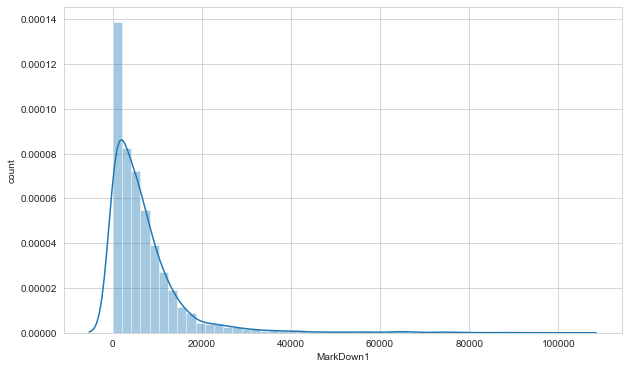

In [10]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.distplot(df1['MarkDown1'])
plt.xlabel('MarkDown1')
plt.ylabel('count')


C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

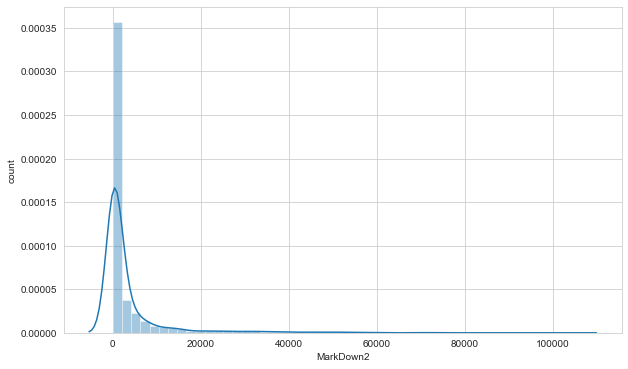

In [11]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.distplot(df1['MarkDown2'])
plt.xlabel('MarkDown2')
plt.ylabel('count')

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

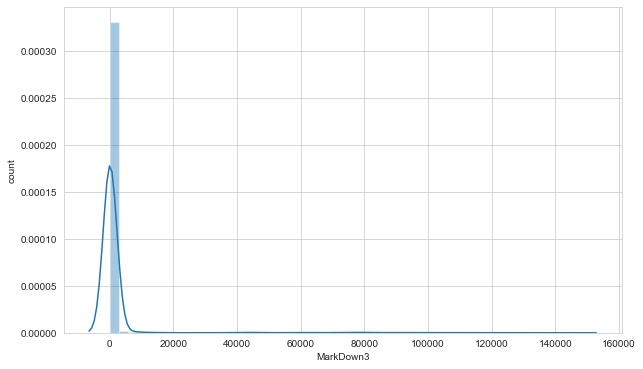

In [12]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.distplot(df1['MarkDown3'])
plt.xlabel('MarkDown3')
plt.ylabel('count')

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

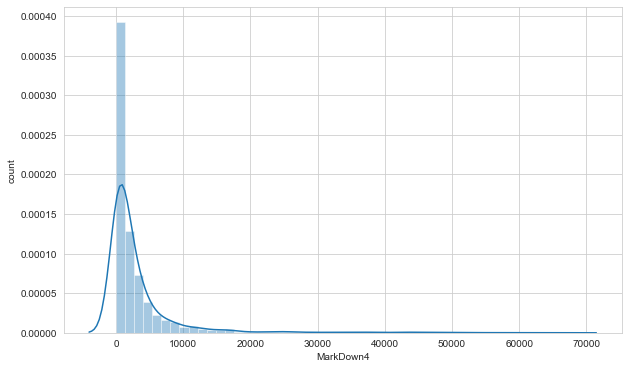

In [13]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.distplot(df1['MarkDown4'])
plt.xlabel('MarkDown4')
plt.ylabel('count')

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

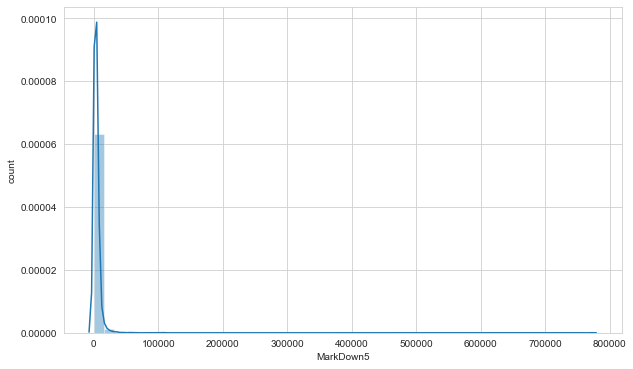

In [14]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.distplot(df1['MarkDown5'])
plt.xlabel('MarkDown5')
plt.ylabel('count')

In [15]:
#Measures of Skewness and Kurtosis
df1.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Store,-0.001278,-1.200863
Temperature,-0.283798,-0.610601
Fuel_Price,-0.301156,-0.958282
MarkDown1,4.008788,23.532215
MarkDown2,4.954324,32.195771
MarkDown3,8.082950,70.628251
MarkDown4,4.855279,28.958852
MarkDown5,50.053870,2894.254684
CPI,0.068659,-1.832018
Unemployment_Rate,1.069548,2.503981


In the code chunk above, we used the agg() method and used a list as the only parameter. This list contained the two methods that we wanted to use (i.e., we wanted to calculate skewness and kurtosis). Finally, we used the transpose() method to change the rows to columns (i.e., transpose the Pandas dataframe) so that we get an output that is a bit easier to check. Here’s the resulting table:

Skewness
- Fairly Symmetrical	-0.5 to 0.5
- Moderate Skewed	-0.5 to -1.0 and 0.5 to 1.0
- Highly Skewed	< -1.0 and > 1.0

In [16]:
#df1['MarkDown1']= np.log(df1['MarkDown1'])
#df1['MarkDown2']= np.log(df1['MarkDown2'])
#df1['MarkDown3']= np.log(df1['MarkDown3'])
#df1['MarkDown4']= np.log(df1['MarkDown4'])
#df1['MarkDown5']= np.log(df1['MarkDown5'])

In [17]:
#Measures of Skewness and Kurtosis
df1.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Store,-0.001278,-1.200863
Temperature,-0.283798,-0.610601
Fuel_Price,-0.301156,-0.958282
MarkDown1,4.008788,23.532215
MarkDown2,4.954324,32.195771
MarkDown3,8.082950,70.628251
MarkDown4,4.855279,28.958852
MarkDown5,50.053870,2894.254684
CPI,0.068659,-1.832018
Unemployment_Rate,1.069548,2.503981


In [18]:
#checking for missing values in df1
df1.isnull().sum()

Store                   0
Date                    0
Temperature             0
Fuel_Price              0
MarkDown1            4157
MarkDown2            5266
MarkDown3            4572
MarkDown4            4722
MarkDown5            4140
CPI                   584
Unemployment_Rate     584
Holiday                 0
dtype: int64

In [19]:
#checking the missing values percentage
(df1.isnull().sum()/len(df1))*100 

Store                 0.000000
Date                  0.000000
Temperature           0.000000
Fuel_Price            0.000000
MarkDown1            51.056252
MarkDown2            64.676984
MarkDown3            56.153279
MarkDown4            57.995578
MarkDown5            50.847458
CPI                   7.172685
Unemployment_Rate     7.172685
Holiday               0.000000
dtype: float64

In [20]:
df1 = df1.dropna(axis=0, subset=['MarkDown1'])
df1.head(100)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday
92,1,11/9/2018,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False
93,1,11/16/2018,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False
94,1,11/23/2018,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True
95,1,2/10/2018,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
96,1,9/10/2018,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False
...,...,...,...,...,...,...,...,...,...,...,...,...
279,2,12/14/2018,50.13,3.159,4908.83,61.03,341.49,469.80,4744.27,218.821793,7.441,False
280,2,12/21/2018,46.66,3.112,2971.04,15.18,1501.75,88.76,6437.61,218.999550,7.441,False
281,2,12/28/2018,44.57,3.129,8321.44,92523.94,139.53,1515.40,3027.69,219.177306,7.441,True
282,2,5/31/2019,46.75,3.157,5886.72,37454.29,121.16,2388.92,7103.97,219.355063,7.057,False


In [21]:
df1.shape

(3985, 12)

<AxesSubplot:xlabel='Holiday', ylabel='MarkDown2'>

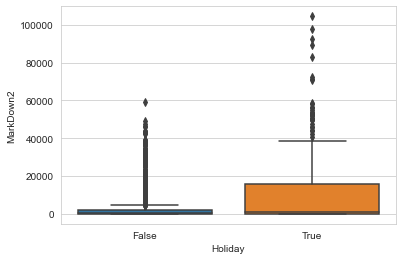

In [22]:
sns.boxplot(x='Holiday',y='MarkDown2',data=df1)

In [23]:
df1.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate
count,3985.000000,3985.000000,3985.00000,3985.000000,2873.000000,3557.000000,3420.000000,3985.000000,3403.000000,3403.000000
mean,22.956587,57.770043,3.62384,7046.807257,3409.750724,1730.985628,3300.197149,4156.291383,175.857629,7.240541
std,12.989197,18.341292,0.27188,9301.053946,8834.916533,11063.152087,6795.748141,13184.197464,40.842851,1.700088
min,1.000000,-7.290000,2.87200,0.270000,0.010000,0.010000,0.220000,40.980000,129.816710,3.684000
25%,12.000000,44.110000,3.44500,1573.240000,72.300000,6.750000,303.520000,1452.640000,136.478800,6.162000
50%,23.000000,58.520000,3.62600,4737.510000,377.880000,37.320000,1178.405000,2743.050000,190.461896,7.138000
75%,34.000000,72.030000,3.80200,8920.010000,2192.750000,164.530000,3310.007500,4848.030000,220.614875,8.243000
max,45.000000,101.950000,4.46800,103184.980000,104519.540000,146394.440000,67474.850000,771448.100000,228.976456,12.890000


In [24]:
 # Handling the missing values in column CPI 
df1['CPI'].fillna(df1['CPI'].mean(),inplace=True)

# Handling the missing values in column Unemployment_Rate 
df1['Unemployment_Rate'].fillna(df1['Unemployment_Rate'].mean(),inplace=True)

#filling the NAN values with median in columns MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
df1['MarkDown1'].fillna(df1['MarkDown1'].median(),inplace=True)
df1['MarkDown2'].fillna(df1['MarkDown2'].median(),inplace=True)
df1['MarkDown3'].fillna(df1['MarkDown3'].median(),inplace=True)
df1['MarkDown4'].fillna(df1['MarkDown4'].median(),inplace=True)
df1['MarkDown5'].fillna(df1['MarkDown5'].median(),inplace=True)
#df1=df1.fillna(0)
#Finally checking the misinging values in df1
df1.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI                  0
Unemployment_Rate    0
Holiday              0
dtype: int64

In [25]:
df1.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate
count,3985.000000,3985.000000,3985.00000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000
mean,22.956587,57.770043,3.62384,7046.807257,2563.718040,1549.081265,2999.365891,4156.291383,175.857629,7.240541
std,12.989197,18.341292,0.27188,9301.053946,7623.572629,10465.166870,6338.824796,13184.197464,37.741881,1.571010
min,1.000000,-7.290000,2.87200,0.270000,0.010000,0.010000,0.220000,40.980000,129.816710,3.684000
25%,12.000000,44.110000,3.44500,1573.240000,138.710000,8.430000,407.810000,1452.640000,137.797097,6.237000
50%,23.000000,58.520000,3.62600,4737.510000,377.880000,37.320000,1178.405000,2743.050000,175.857629,7.240541
75%,34.000000,72.030000,3.80200,8920.010000,1027.900000,128.970000,2776.580000,4848.030000,218.768720,8.010000
max,45.000000,101.950000,4.46800,103184.980000,104519.540000,146394.440000,67474.850000,771448.100000,228.976456,12.890000


In [26]:
#Checking the final shape of df1 dataset
df1.shape

(3985, 12)

In [27]:
df1.head(100)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday
92,1,11/9/2018,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False
93,1,11/16/2018,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False
94,1,11/23/2018,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True
95,1,2/10/2018,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
96,1,9/10/2018,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False
...,...,...,...,...,...,...,...,...,...,...,...,...
279,2,12/14/2018,50.13,3.159,4908.83,61.03,341.49,469.80,4744.27,218.821793,7.441,False
280,2,12/21/2018,46.66,3.112,2971.04,15.18,1501.75,88.76,6437.61,218.999550,7.441,False
281,2,12/28/2018,44.57,3.129,8321.44,92523.94,139.53,1515.40,3027.69,219.177306,7.441,True
282,2,5/31/2019,46.75,3.157,5886.72,37454.29,121.16,2388.92,7103.97,219.355063,7.057,False


{'whiskers': [<matplotlib.lines.Line2D at 0x1fc8115a7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc8115aeb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc8115a490>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc811665b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc81166910>],
 'means': []}

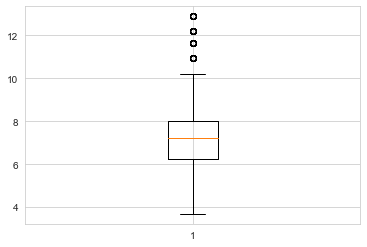

In [28]:
plt.boxplot(df1['Unemployment_Rate'])

In [29]:
df1['Unemployment_Rate']= np.where(df1['Unemployment_Rate']>11,11,df1['Unemployment_Rate'])
df1['Unemployment_Rate']= np.where(df1['Unemployment_Rate']<5,5,df1['Unemployment_Rate'])

In [30]:
#We will do with IQR
IQR= df1.MarkDown1.quantile(0.75)-df1.MarkDown1.quantile(0.25)
IQR

7346.77

In [31]:
Upper_bound= df1.MarkDown1.quantile(0.75)+(1.5*IQR)
lower_bound= df1.MarkDown1.quantile(0.25)-(1.5*IQR)
print(Upper_bound),print(lower_bound)

19940.165
-9446.915


(None, None)

In [32]:
df1.loc[df1["MarkDown1"]>14013.095,"MarkDown1"]=14013.095
df1.loc[df1["MarkDown1"]<0,"MarkDown1"]=0

In [33]:
IQR= df1.MarkDown2.quantile(0.75)-df1.MarkDown2.quantile(0.25)
IQR

Upper_bound= df1.MarkDown2.quantile(0.75)+(1.5*IQR)
lower_bound= df1.MarkDown2.quantile(0.25)-(1.5*IQR)
print(Upper_bound),print(lower_bound)

2361.6850000000004
-1195.075


(None, None)

In [34]:
df1.loc[df1["MarkDown2"]>2361.6,"MarkDown2"]=2361.6
df1.loc[df1["MarkDown2"]<0,"MarkDown2"]=0

In [35]:
IQR= df1.MarkDown3.quantile(0.75)-df1.MarkDown3.quantile(0.25)
IQR

Upper_bound= df1.MarkDown3.quantile(0.75)+(1.5*IQR)
lower_bound= df1.MarkDown3.quantile(0.25)-(1.5*IQR)
print(Upper_bound),print(lower_bound)

309.78
-172.38


(None, None)

In [36]:
df1.loc[df1["MarkDown3"]>309.7,"MarkDown3"]=309.7
df1.loc[df1["MarkDown3"]<0,"MarkDown3"]=0

In [37]:
IQR= df1.MarkDown4.quantile(0.75)-df1.MarkDown4.quantile(0.25)
IQR

Upper_bound= df1.MarkDown4.quantile(0.75)+(1.5*IQR)
lower_bound= df1.MarkDown4.quantile(0.25)-(1.5*IQR)
print(Upper_bound),print(lower_bound)

6329.735
-3145.345


(None, None)

In [38]:
df1.loc[df1["MarkDown4"]>6329.73,"MarkDown4"]=6329.73
df1.loc[df1["MarkDown4"]<0,"MarkDown4"]=0

In [39]:
IQR= df1.MarkDown5.quantile(0.75)-df1.MarkDown5.quantile(0.25)
IQR

Upper_bound= df1.MarkDown5.quantile(0.75)+(1.5*IQR)
lower_bound= df1.MarkDown5.quantile(0.25)-(1.5*IQR)
print(Upper_bound),print(lower_bound)

9941.114999999998
-3640.444999999999


(None, None)

In [40]:
df1.loc[df1["MarkDown5"]>9941.1,"MarkDown5"]=9941.1
df1.loc[df1["MarkDown5"]<0,"MarkDown5"]=0

{'whiskers': [<matplotlib.lines.Line2D at 0x1fc80f14ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc80f90dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc80c5efd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc80fcf700>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc80eaee20>],
 'means': []}

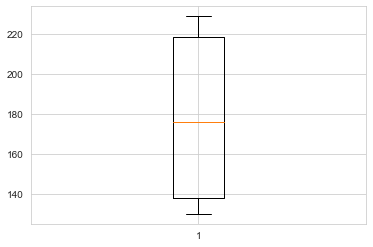

In [41]:
plt.boxplot(df1['CPI'])

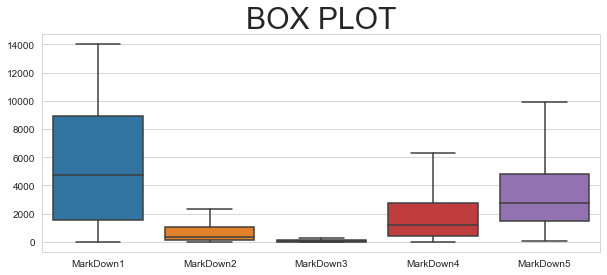

In [120]:
#Box Plot Before normalization
plt.figure(figsize = (10,4))
plt.title('BOX PLOT', fontsize=30)
sns.boxplot(data = markdown)
plt.show()

In [42]:
#normalizing markdown data
markdown= df1[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]
normal_markdown = (markdown - markdown.min())/ (markdown.max() - markdown.min())
normal_markdown.head()

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
92,0.740938,1.000000,0.694436,0.380187,0.657612
93,0.433449,0.107716,0.167813,0.067489,0.600759
94,0.029262,0.041493,1.000000,0.001229,0.051913
95,0.401721,0.028790,1.000000,0.329318,1.000000
96,0.331152,0.008041,0.339081,0.574958,1.000000


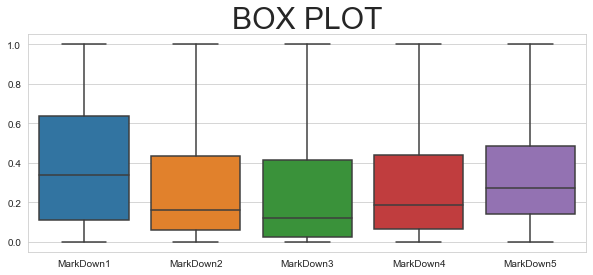

In [43]:
#Box Plot After normalization
plt.figure(figsize = (10,4))
plt.title('BOX PLOT', fontsize=30)
sns.boxplot(data = normal_markdown)
plt.show()

In [44]:
df1.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate
count,3985.000000,3985.000000,3985.00000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000
mean,22.956587,57.770043,3.62384,5673.804353,746.599558,89.996479,1933.238967,3507.294324,175.857629,7.260027
std,12.989197,18.341292,0.27188,4604.135026,844.347016,109.463387,2015.700516,2626.475570,37.741881,1.396255
min,1.000000,-7.290000,2.87200,0.270000,0.010000,0.010000,0.220000,40.980000,129.816710,5.000000
25%,12.000000,44.110000,3.44500,1573.240000,138.710000,8.430000,407.810000,1452.640000,137.797097,6.237000
50%,23.000000,58.520000,3.62600,4737.510000,377.880000,37.320000,1178.405000,2743.050000,175.857629,7.240541
75%,34.000000,72.030000,3.80200,8920.010000,1027.900000,128.970000,2776.580000,4848.030000,218.768720,8.010000
max,45.000000,101.950000,4.46800,14013.095000,2361.600000,309.700000,6329.730000,9941.100000,228.976456,11.000000


In [45]:
df1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday
92,1,11/9/2018,59.11,3.297,10382.90,2361.60,215.07,2406.62,6551.42,217.998085,7.866,False
93,1,11/16/2018,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False
94,1,11/23/2018,60.14,3.236,410.31,98.00,309.70,8.00,554.92,218.467621,7.866,True
95,1,2/10/2018,48.91,3.172,5629.51,68.00,309.70,2084.64,9941.10,218.714733,7.866,False
96,1,9/10/2018,43.93,3.158,4640.65,19.00,105.02,3639.42,9941.10,218.961846,7.866,False


#### Now lets see the df2 which is sales data

In [46]:
df2= pd.read_csv('Sales_History.csv')
df2.head()

,Store,Department,Date,Total_Sales,Holiday
0,1,1,4/30/2017,24924.50,False
1,1,1,11/30/2017,46039.49,True
2,1,1,2/17/2017,41595.55,False
3,1,1,2/24/2017,19403.54,False
4,1,1,05-01-2017,21827.90,False


In [47]:
df2.shape

(421570, 5)

In [48]:
# Lets describe the df2 data
df2.describe()

,Store,Department,Total_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


 As we can see the Total_sales the minimum values is neagtive, but it should not be neagtive. Total sales will not in neagtive

In [49]:
# Checking how many sells records/rows are negative 
df2[df2['Total_Sales']<0]

,Store,Department,Date,Total_Sales,Holiday
846,1,6,10-07-2019,-139.65,False
2384,1,18,04-04-2019,-1.27,False
6048,1,47,2/17/2017,-863.00,False
6049,1,47,12-01-2017,-698.00,False
6051,1,47,08-08-2017,-58.00,False
...,...,...,...,...,...
419597,45,80,11/30/2017,-0.43,True
419598,45,80,2/17/2017,-0.27,False
419603,45,80,4/14/2017,-1.61,False
419614,45,80,02-05-2017,-0.27,False


 As we see there are lots of noisy data here, we need to remove these sales records 

In [50]:
# Droping all the negative values in columns 'Total_Sales'
df2.drop(df2.index[df2['Total_Sales'] <0], inplace = True)

In [51]:
# Lets describe ahain the df2 data
df2.describe()

,Store,Department,Total_Sales
count,420285.000000,420285.000000,420285.000000
mean,22.195477,44.242771,16030.329773
std,12.787213,30.507197,22728.500149
min,1.000000,1.000000,0.000000
25%,11.000000,18.000000,2117.560000
50%,22.000000,37.000000,7659.090000
75%,33.000000,74.000000,20268.380000
max,45.000000,99.000000,693099.360000


As we seen there are sales values which 0, we also remove these sales records

In [52]:
# Letse see how many Total sales record equal to zero
df2[df2['Total_Sales']==0]

,Store,Department,Date,Total_Sales,Holiday
6055,1,47,11-01-2018,0.0,False
6059,1,47,12-06-2018,0.0,False
6060,1,47,8/17/2018,0.0,False
16309,2,47,04-12-2019,0.0,False
17457,2,60,3/17/2017,0.0,False
...,...,...,...,...,...
403340,43,85,01-11-2019,0.0,False
407652,44,27,01-12-2018,0.0,False
417805,45,47,10/31/2018,0.0,True
418079,45,54,10/13/2017,0.0,False


In [53]:
# Droping all the 0 sales values in columns 'Total_Sales'
df2.drop(df2.index[df2['Total_Sales'] == 0], inplace = True)

In [54]:
# Lets see how many Total sales record less than 1
df2[df2['Total_Sales']<1]

,Store,Department,Date,Total_Sales,Holiday
2300,1,18,05-12-2017,0.50,False
2302,1,18,11-04-2017,0.15,False
2343,1,18,5/25/2018,0.35,False
2346,1,18,01-05-2018,0.50,False
2347,1,18,7/13/2018,0.30,False
...,...,...,...,...,...
414325,45,18,5/17/2019,0.30,False
414326,45,18,08-05-2019,0.50,False
417874,45,49,8/30/2019,0.06,False
417899,45,51,8/24/2018,0.50,False


In [55]:
# Droping all the sales values  less than 1 in columns 'Total_Sales'
df2.drop(df2.index[df2['Total_Sales'] < 1], inplace = True)

In [56]:
#lets see the shape of data
df2.shape

(419564, 5)

In [57]:
# Checking the missing values 
df2.isnull().sum()

Store          0
Department     0
Date           0
Total_Sales    0
Holiday        0
dtype: int64

In [58]:
# Lets see final describe of dataframe df2
df2.describe()

,Store,Department,Total_Sales
count,419564.000000,419564.000000,419564.000000
mean,22.193577,44.230353,16057.876531
std,12.786596,30.497080,22738.296157
min,1.000000,1.000000,1.000000
25%,11.000000,18.000000,2139.490000
50%,22.000000,37.000000,7689.280000
75%,33.000000,74.000000,20300.582500
max,45.000000,99.000000,693099.360000


**Now we can conclude from sales data which is df2 there are total 45 stores, 99 Departments and the average total sales is 16057.876531**

In [59]:
#Now we will groupby sales by date and store 
df2=df2.groupby(['Store','Date']).agg({'Total_Sales': 'sum'})
# We will reset the index
df2.reset_index(inplace=True)
df2.head()

,Store,Date,Total_Sales
0,1,01-02-2018,1495064.75
1,1,01-04-2019,1624477.38
2,1,01-05-2018,1488537.59
3,1,01-08-2017,1453329.50
4,1,01-11-2019,1459601.17


In [60]:
# Now after aggregating the Total_sales lets see the shape of df2
df2.shape

(6435, 3)

In [61]:
df2.isnull().sum()

Store          0
Date           0
Total_Sales    0
dtype: int64

In [62]:
# Lets look at the datatype 
print(df1.info())
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3985 entries, 92 to 8189
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Store              3985 non-null   int64  
 1   Date               3985 non-null   object 
 2   Temperature        3985 non-null   float64
 3   Fuel_Price         3985 non-null   float64
 4   MarkDown1          3985 non-null   float64
 5   MarkDown2          3985 non-null   float64
 6   MarkDown3          3985 non-null   float64
 7   MarkDown4          3985 non-null   float64
 8   MarkDown5          3985 non-null   float64
 9   CPI                3985 non-null   float64
 10  Unemployment_Rate  3985 non-null   float64
 11  Holiday            3985 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 506.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dt

#### Merging Two data Frame df1 and df2

In [63]:
# Merging the dataframe 
df= pd.merge(df1,df2, how='inner',on=['Date','Store'])
df.shape

(1327, 13)

In [64]:
print(df1.shape)
print(df2.shape)

(3985, 12)
(6435, 3)


In [65]:
6435-3985

2450

In [66]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales
0,1,11/16/2018,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False,1539483.70
1,1,11/23/2018,60.14,3.236,410.31,98.00,309.70,8.00,554.92,218.467621,7.866,True,2033320.66
2,1,12/14/2018,51.63,3.159,5011.32,67.00,309.70,225.79,4011.37,219.179453,7.866,False,1881176.67
3,1,12/21/2018,47.96,3.112,2725.36,40.48,309.70,24.90,2739.43,219.357722,7.866,False,2270686.99
4,1,12/28/2018,44.55,3.129,5762.10,2361.60,260.36,983.65,4735.78,219.535990,7.866,True,1497462.72


In [67]:
df.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI                  0
Unemployment_Rate    0
Holiday              0
Total_Sales          0
dtype: int64

In [68]:
# Lets look at the info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1327 entries, 0 to 1326
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Store              1327 non-null   int64  
 1   Date               1327 non-null   object 
 2   Temperature        1327 non-null   float64
 3   Fuel_Price         1327 non-null   float64
 4   MarkDown1          1327 non-null   float64
 5   MarkDown2          1327 non-null   float64
 6   MarkDown3          1327 non-null   float64
 7   MarkDown4          1327 non-null   float64
 8   MarkDown5          1327 non-null   float64
 9   CPI                1327 non-null   float64
 10  Unemployment_Rate  1327 non-null   float64
 11  Holiday            1327 non-null   bool   
 12  Total_Sales        1327 non-null   float64
dtypes: bool(1), float64(10), int64(1), object(1)
memory usage: 136.1+ KB


In [69]:
# Replacing the Column Holidays , False =NO, and True=YES
df['Holiday']=np.where(df['Holiday']==False,"NO","YES")

# converting the column of Date into Datetime datatype and extracting week number from date columns
df['weeknumber']= pd.to_datetime(df['Date'],errors ='coerce').dt.week

df.head()

<ipython-input-69-e9ddd20f830f>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weeknumber']= pd.to_datetime(df['Date'],errors ='coerce').dt.week


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales,weeknumber
0,1,11/16/2018,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,NO,1539483.70,46
1,1,11/23/2018,60.14,3.236,410.31,98.00,309.70,8.00,554.92,218.467621,7.866,YES,2033320.66,47
2,1,12/14/2018,51.63,3.159,5011.32,67.00,309.70,225.79,4011.37,219.179453,7.866,NO,1881176.67,50
3,1,12/21/2018,47.96,3.112,2725.36,40.48,309.70,24.90,2739.43,219.357722,7.866,NO,2270686.99,51
4,1,12/28/2018,44.55,3.129,5762.10,2361.60,260.36,983.65,4735.78,219.535990,7.866,YES,1497462.72,52


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1327 entries, 0 to 1326
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Store              1327 non-null   int64  
 1   Date               1327 non-null   object 
 2   Temperature        1327 non-null   float64
 3   Fuel_Price         1327 non-null   float64
 4   MarkDown1          1327 non-null   float64
 5   MarkDown2          1327 non-null   float64
 6   MarkDown3          1327 non-null   float64
 7   MarkDown4          1327 non-null   float64
 8   MarkDown5          1327 non-null   float64
 9   CPI                1327 non-null   float64
 10  Unemployment_Rate  1327 non-null   float64
 11  Holiday            1327 non-null   object 
 12  Total_Sales        1327 non-null   float64
 13  weeknumber         1327 non-null   int64  
dtypes: float64(10), int64(2), object(2)
memory usage: 155.5+ KB


In [71]:
df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Total_Sales,weeknumber
count,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1.327000e+03,1327.000000
mean,22.936699,60.340987,3.652894,4719.278044,624.802864,68.092351,1540.724842,3567.417347,175.358215,7.427764,1.066663e+06,27.809344
std,12.987483,17.400911,0.292996,4022.354872,822.188957,99.235291,1672.717400,2542.767470,40.551130,1.514458,5.854267e+05,14.610498
min,1.000000,12.190000,3.038000,0.270000,0.030000,0.010000,0.410000,135.160000,129.826833,5.000000,2.153612e+05,3.000000
25%,12.000000,48.130000,3.445000,1117.380000,66.010000,4.590000,391.445000,1593.760000,136.478800,6.334000,5.603720e+05,16.000000
50%,23.000000,62.390000,3.664000,3886.230000,377.880000,28.620000,1178.405000,2907.570000,189.842483,7.244000,9.706413e+05,26.000000
75%,34.000000,73.535000,3.862000,7055.620000,556.885000,68.940000,1854.495000,4875.885000,220.043614,8.256000,1.449698e+06,39.000000
max,45.000000,96.790000,4.449000,14013.095000,2361.600000,309.700000,6329.730000,9941.100000,227.232807,11.000000,3.676389e+06,52.000000


In [72]:
#Measures of Skewness and Kurtosis
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Store,0.006601,-1.196190
Temperature,-0.310955,-0.655399
Fuel_Price,-0.014870,-0.453741
MarkDown1,0.774802,-0.292050
MarkDown2,1.428567,0.375785
MarkDown3,1.669403,1.304310
MarkDown4,1.683251,2.105993
MarkDown5,0.973193,0.168035
CPI,0.047470,-1.862566
Unemployment_Rate,0.565987,-0.008119


## EDA (Exploratory Data Analysis) on the cleaned Data

### Univariate analysis

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

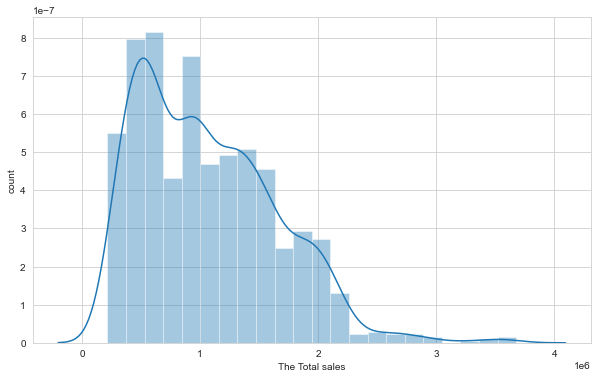

In [73]:
# Univariate analysis of column Total_Sales
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.distplot(df['Total_Sales'])
plt.xlabel('The Total sales')
plt.ylabel('count')

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

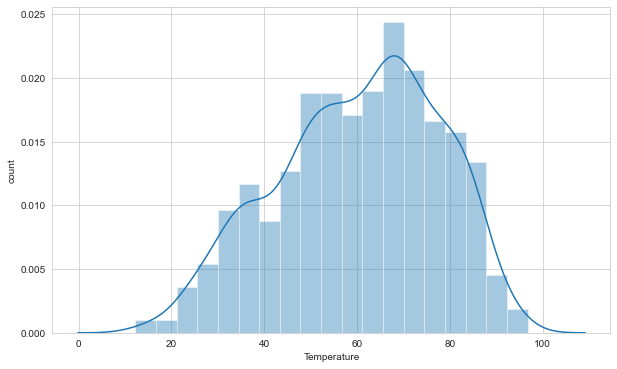

In [74]:
# Univariate analysis of column Temperature
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.distplot(df['Temperature'])
plt.xlabel('Temperature')
plt.ylabel('count')


As we see the Temprature column is almost normally distributed

Text(3.9250000000000043, 0.5, 'count')

<Figure size 1080x720 with 0 Axes>

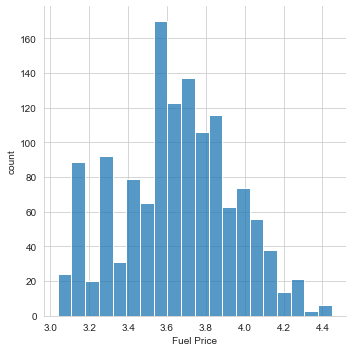

In [75]:
# Univariate analysis of column Fuel_Price
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
sns.displot(df['Fuel_Price'], bins=20)
plt.xlabel('Fuel Price')
plt.ylabel('count')


C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

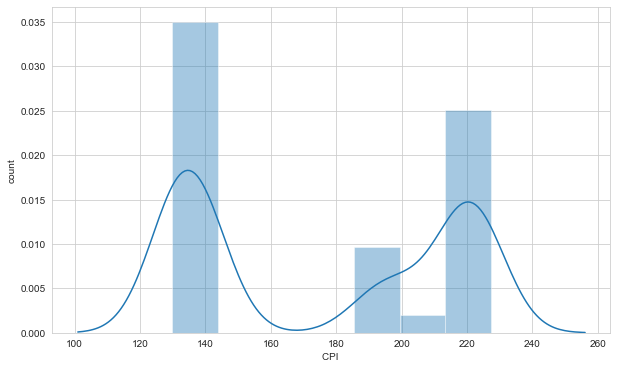

In [76]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.distplot(df['CPI'])
plt.xlabel('CPI ')
plt.ylabel('count')

The average mean of CPI is 172.409314

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weeknumber', ylabel='count'>

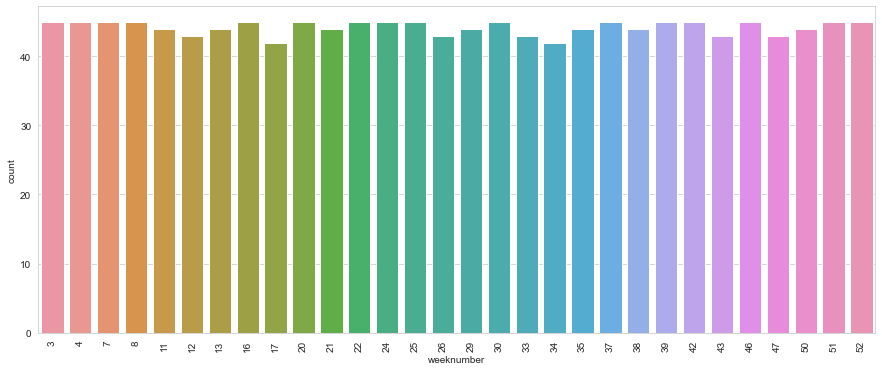

In [77]:

plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.countplot(df.weeknumber)

As we seen in above graph maximum sales was done in 1 week followed by 18,19,28,and 37

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Holiday', ylabel='count'>

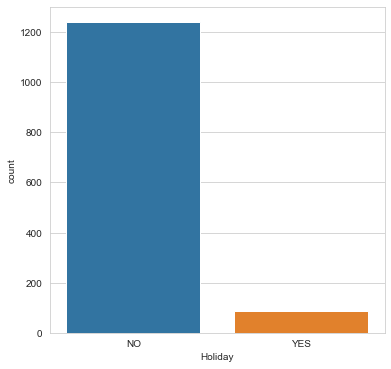

In [78]:
plt.figure(figsize=(6,6))
sns.countplot(df['Holiday'])

### Bivariate analysis


<AxesSubplot:xlabel='Holiday', ylabel='Total_Sales'>

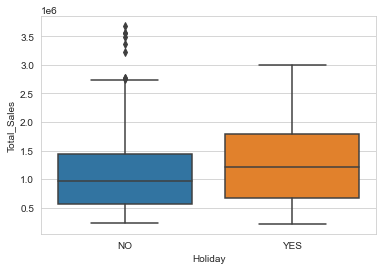

In [79]:
# Holidays and sales 
sns.boxplot(x='Holiday',y='Total_Sales',data=df)

By looking at above graph we conclude that there is more sales during the Holidays. It means that poeple prefer to do shopping during the holidays. So during the holidays we would recommended to give some good offer to attract the customers.

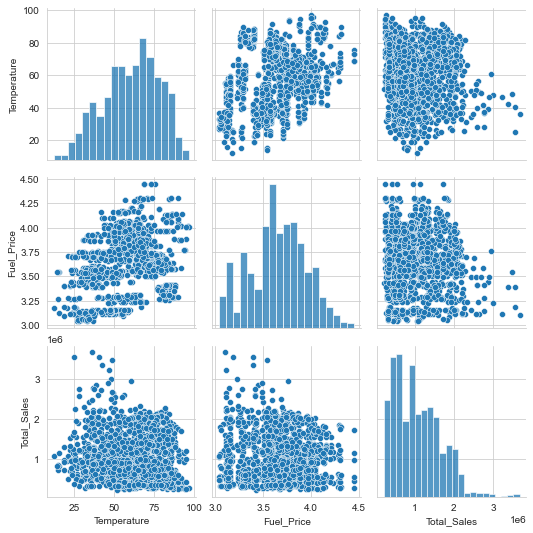

In [80]:
 sns.pairplot(df[['Temperature', 'Fuel_Price', 'Total_Sales']])

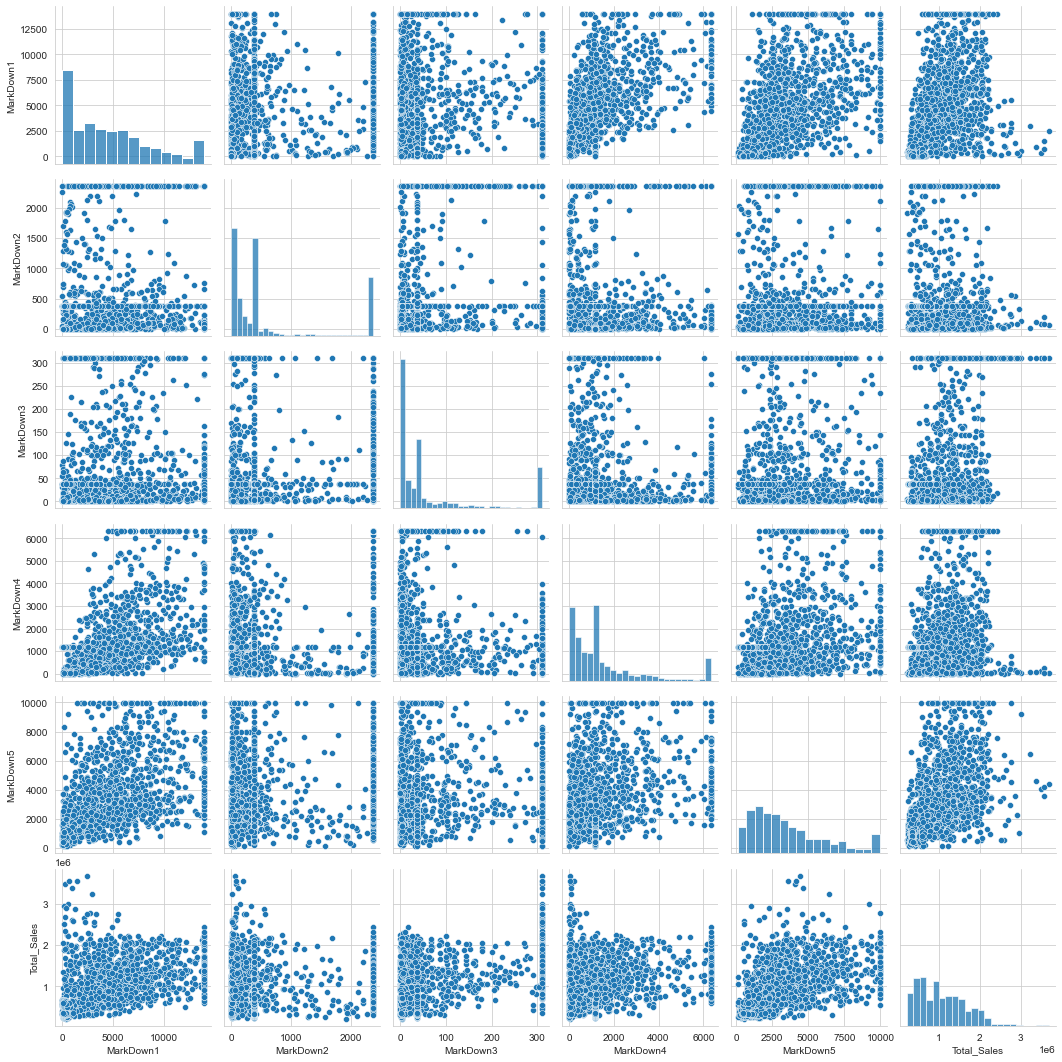

In [81]:
sns.pairplot(df[['MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'Total_Sales']])

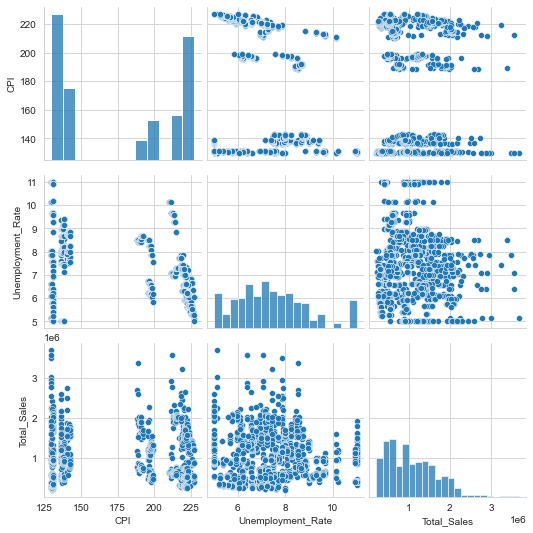

In [82]:
sns.pairplot(df[['CPI', 'Unemployment_Rate','Total_Sales']])

<AxesSubplot:xlabel='MarkDown1', ylabel='Total_Sales'>

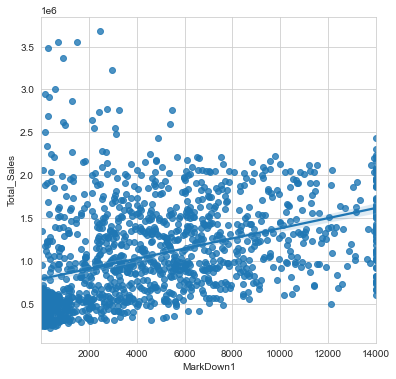

In [129]:
# plotting a scatter plot between total_sales and markdown1 ---> to see effect of markdown1 on total_sales
plt.figure(figsize=(6,6))
sns.regplot(x="MarkDown1",y= "Total_Sales", data=df)

<AxesSubplot:xlabel='MarkDown2', ylabel='Total_Sales'>

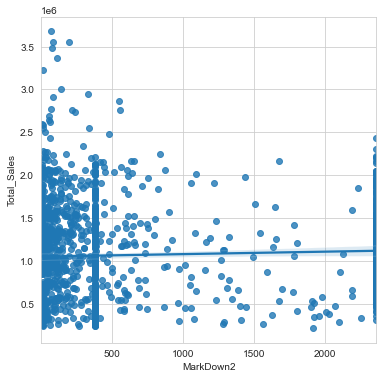

In [128]:
# plotting a scatter plot between total_sales and markdown2 ---> to see effect of markdown2 on total_sales
plt.figure(figsize=(6,6))
sns.regplot(x="MarkDown2",y= "Total_Sales", data=df)

<AxesSubplot:xlabel='MarkDown5', ylabel='Total_Sales'>

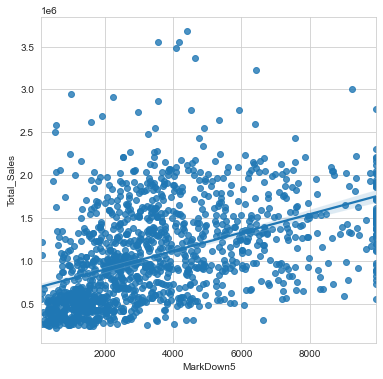

In [127]:
# plotting a scatter plot between total_sales and markdown5 ---> to see effect of markdown5 on total_sales
plt.figure(figsize=(6,6))
sns.regplot(x="MarkDown5",y= "Total_Sales", data=df)

<AxesSubplot:xlabel='MarkDown3', ylabel='Total_Sales'>

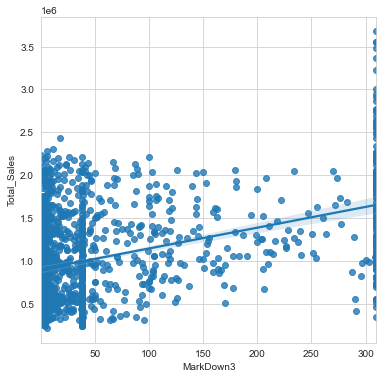

In [126]:
# plotting a scatter plot between total_sales and markdown3 ---> to see effect of markdown3 on total_sales
plt.figure(figsize=(6,6))
sns.regplot(x="MarkDown3",y= "Total_Sales", data=df)

In [83]:
df.head(100)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales,weeknumber
0,1,11/16/2018,62.25,3.308,6074.120,254.39,51.98,427.39,5988.57,218.220509,7.866,NO,1539483.70,46
1,1,11/23/2018,60.14,3.236,410.310,98.00,309.70,8.00,554.92,218.467621,7.866,YES,2033320.66,47
2,1,12/14/2018,51.63,3.159,5011.320,67.00,309.70,225.79,4011.37,219.179453,7.866,NO,1881176.67,50
3,1,12/21/2018,47.96,3.112,2725.360,40.48,309.70,24.90,2739.43,219.357722,7.866,NO,2270686.99,51
4,1,12/28/2018,44.55,3.129,5762.100,2361.60,260.36,983.65,4735.78,219.535990,7.866,YES,1497462.72,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4,5/31/2019,38.64,3.158,7857.710,2361.60,234.00,863.22,8682.95,130.157516,5.000,NO,2047854.07,22
96,4,1/18/2019,42.09,3.273,2109.410,2361.60,44.16,918.36,1116.83,130.279226,5.000,NO,2005097.76,3
97,4,1/25/2019,40.31,3.290,1346.060,2361.60,46.16,445.47,2451.89,130.314452,5.000,NO,1928720.51,4
98,4,2/15/2019,34.19,3.493,14013.095,2361.60,17.36,6329.73,7565.99,130.454621,5.000,NO,2427640.17,7


In [84]:
df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Total_Sales,weeknumber
count,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1.327000e+03,1327.000000
mean,22.936699,60.340987,3.652894,4719.278044,624.802864,68.092351,1540.724842,3567.417347,175.358215,7.427764,1.066663e+06,27.809344
std,12.987483,17.400911,0.292996,4022.354872,822.188957,99.235291,1672.717400,2542.767470,40.551130,1.514458,5.854267e+05,14.610498
min,1.000000,12.190000,3.038000,0.270000,0.030000,0.010000,0.410000,135.160000,129.826833,5.000000,2.153612e+05,3.000000
25%,12.000000,48.130000,3.445000,1117.380000,66.010000,4.590000,391.445000,1593.760000,136.478800,6.334000,5.603720e+05,16.000000
50%,23.000000,62.390000,3.664000,3886.230000,377.880000,28.620000,1178.405000,2907.570000,189.842483,7.244000,9.706413e+05,26.000000
75%,34.000000,73.535000,3.862000,7055.620000,556.885000,68.940000,1854.495000,4875.885000,220.043614,8.256000,1.449698e+06,39.000000
max,45.000000,96.790000,4.449000,14013.095000,2361.600000,309.700000,6329.730000,9941.100000,227.232807,11.000000,3.676389e+06,52.000000


### Feature Engineering

In [85]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales,weeknumber
0,1,11/16/2018,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,NO,1539483.70,46
1,1,11/23/2018,60.14,3.236,410.31,98.00,309.70,8.00,554.92,218.467621,7.866,YES,2033320.66,47
2,1,12/14/2018,51.63,3.159,5011.32,67.00,309.70,225.79,4011.37,219.179453,7.866,NO,1881176.67,50
3,1,12/21/2018,47.96,3.112,2725.36,40.48,309.70,24.90,2739.43,219.357722,7.866,NO,2270686.99,51
4,1,12/28/2018,44.55,3.129,5762.10,2361.60,260.36,983.65,4735.78,219.535990,7.866,YES,1497462.72,52


In [86]:
# One hot encoding in Holiday column 
df['Holiday'].replace({"YES":1,"NO":0},inplace=True)
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales,weeknumber
0,1,11/16/2018,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,0,1539483.70,46
1,1,11/23/2018,60.14,3.236,410.31,98.00,309.70,8.00,554.92,218.467621,7.866,1,2033320.66,47
2,1,12/14/2018,51.63,3.159,5011.32,67.00,309.70,225.79,4011.37,219.179453,7.866,0,1881176.67,50
3,1,12/21/2018,47.96,3.112,2725.36,40.48,309.70,24.90,2739.43,219.357722,7.866,0,2270686.99,51
4,1,12/28/2018,44.55,3.129,5762.10,2361.60,260.36,983.65,4735.78,219.535990,7.866,1,1497462.72,52


In [87]:
df.drop(['Date','Store'],inplace=True,axis=1)

#### Trianing and test data
We will seperate the train data and test data, we will predict the missing Total sales value.

In [88]:
# splitting the training data and test data
train= df.copy()
test= df.drop(['Total_Sales'],axis=1)
train.head()


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales,weeknumber
0,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,0,1539483.70,46
1,60.14,3.236,410.31,98.00,309.70,8.00,554.92,218.467621,7.866,1,2033320.66,47
2,51.63,3.159,5011.32,67.00,309.70,225.79,4011.37,219.179453,7.866,0,1881176.67,50
3,47.96,3.112,2725.36,40.48,309.70,24.90,2739.43,219.357722,7.866,0,2270686.99,51
4,44.55,3.129,5762.10,2361.60,260.36,983.65,4735.78,219.535990,7.866,1,1497462.72,52


In [89]:
train.isnull().sum()

Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI                  0
Unemployment_Rate    0
Holiday              0
Total_Sales          0
weeknumber           0
dtype: int64

In [90]:
train.shape

(1327, 12)

In [91]:
train.dropna(inplace=True)

### Features selection
1. Correlation
2. SelectKBest (ANOVA )
3. Features Importance

In [92]:
# Now we split train data into indepedent and dependent features
X= train.drop('Total_Sales',axis=1) #independent 
y=train['Total_Sales'] #dependent 

In [93]:
X.shape

(1327, 11)

In [94]:
y.shape

(1327,)

#### Correlation

In [95]:
# now lets see corerelation of independent and dependet variables
X.corr()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,weeknumber
Temperature,1.000000,0.298155,0.011879,-0.516596,-0.303910,0.176625,0.020192,0.182356,0.018917,-0.253370,0.065561
Fuel_Price,0.298155,1.000000,0.230796,-0.248737,-0.277028,0.120458,-0.019797,-0.400383,0.268050,-0.276016,-0.162570
MarkDown1,0.011879,0.230796,1.000000,0.155112,-0.024347,0.621880,0.538830,-0.092366,0.071353,-0.162663,-0.145518
MarkDown2,-0.516596,-0.248737,0.155112,1.000000,0.021796,0.065592,0.143428,-0.059966,0.042614,0.207425,-0.328305
MarkDown3,-0.303910,-0.277028,-0.024347,0.021796,1.000000,-0.171350,0.052084,-0.043730,0.037650,0.371566,0.383528
MarkDown4,0.176625,0.120458,0.621880,0.065592,-0.171350,1.000000,0.335284,-0.066144,0.039178,-0.168321,-0.140314
MarkDown5,0.020192,-0.019797,0.538830,0.143428,0.052084,0.335284,1.000000,0.042141,-0.043597,-0.140992,0.021605
CPI,0.182356,-0.400383,-0.092366,-0.059966,-0.043730,-0.066144,0.042141,1.000000,-0.308151,-0.004839,-0.000057
Unemployment_Rate,0.018917,0.268050,0.071353,0.042614,0.037650,0.039178,-0.043597,-0.308151,1.000000,0.048575,0.005494
Holiday,-0.253370,-0.276016,-0.162663,0.207425,0.371566,-0.168321,-0.140992,-0.004839,0.048575,1.000000,0.396838


<AxesSubplot:>

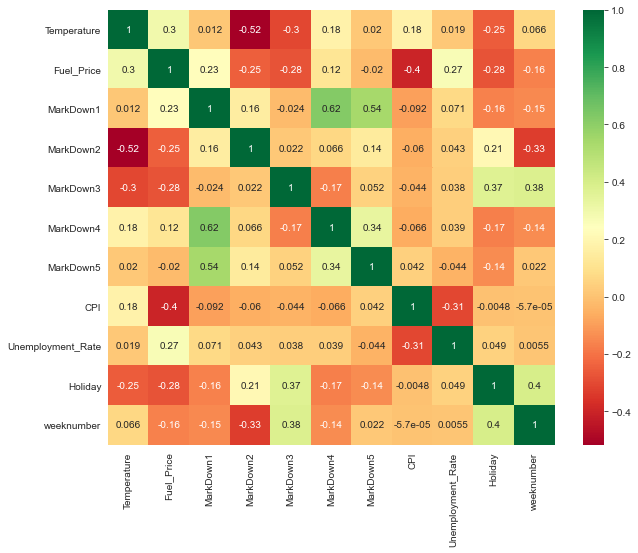

In [96]:
# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(),annot = True, cmap = "RdYlGn")

In [97]:
#Removing correlated features
Threshold=0.9

In [98]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [99]:
correlation(X,Threshold)

set()

**From correlation we conclude that the none of independent features are highly correlated, so there is no multicollinarity** 

#### SelectKBasket

In [100]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
fs= SelectKBest(score_func=f_regression,k=5)
X_selected= fs.fit_transform(X,y)

In [101]:
X_selected

array([[6.07412e+03, 5.19800e+01, 4.27390e+02, 5.98857e+03, 4.60000e+01],
       [4.10310e+02, 3.09700e+02, 8.00000e+00, 5.54920e+02, 4.70000e+01],
       [5.01132e+03, 3.09700e+02, 2.25790e+02, 4.01137e+03, 5.00000e+01],
       ...,
       [4.55661e+03, 1.50000e+00, 1.60101e+03, 3.28825e+03, 3.90000e+01],
       [2.00402e+03, 3.18000e+00, 4.37730e+02, 1.53749e+03, 4.20000e+01],
       [4.01891e+03, 1.00000e+02, 2.11940e+02, 8.58330e+02, 4.30000e+01]])

#### Features Importance

In [102]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

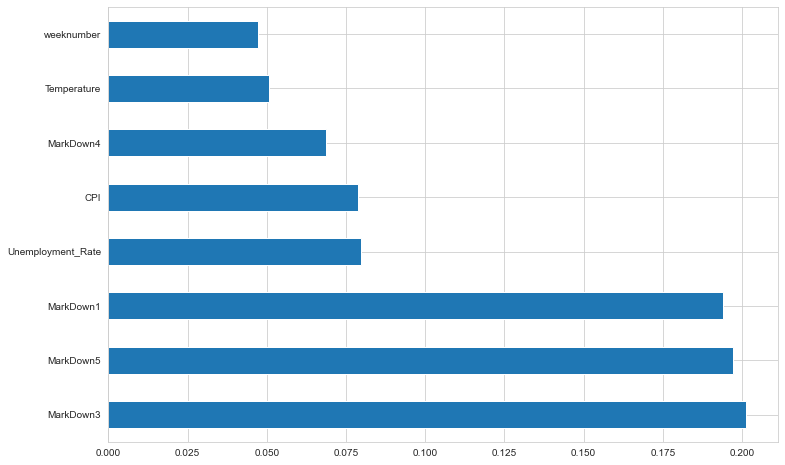

In [103]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [104]:
X.columns

Index(['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment_Rate', 'Holiday',
       'weeknumber'],
      dtype='object')

Fitting models
- Split dataset into train and test set in order to prediction w.r.t X_test
- Scaling of features
- Import model
- Fit the data
- Predict w.r.t X_test
- In regression check RSME Score
- Plot error graph
- finally pick the best model and predict the missing sales values

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [106]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
###  fit_transform
X_train_scaled=scaler.fit_transform(X_train) #alway give parameter in fit_transform

In [107]:
X_test_scaled=scaler.transform(X_test)

In [108]:
X_test_scaled.shape

(266, 11)

In [109]:
X_train_scaled.shape

(1061, 11)

#### Linear Regression Model

In [110]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train_scaled,y_train)

LinearRegression()

In [111]:
# predicting the model
y_pred=reg.predict(X_test_scaled)

In [112]:
#Accuracy
print(reg.score(X_test_scaled,y_test))
print(reg.score(X_train_scaled,y_train))

0.38872588859824886
0.4477844135211405


#### Random Forest model

In [113]:
from sklearn.ensemble import RandomForestRegressor
rf_reg= RandomForestRegressor()
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [114]:
y_pred= rf_reg.predict(X_test)

In [115]:
#Accuracy
print(rf_reg.score(X_test,y_test))
print(rf_reg.score(X_train,y_train))

0.6191232166602592
0.9450072582695768


In [116]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute percentage Error:',metrics.mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error: 254578.11137669176
Mean Squared Error: 126922395330.50032
Root Mean Squared Error: 356261.69500873977
Mean Absolute percentage Error: 0.3195292702333707


In [118]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(rf_reg,X,y,cv=5)
print(score)
np.mean(score)

[ 0.50157555  0.29550929 -0.1260931   0.46631029  0.52225626]


0.33191165601430195

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


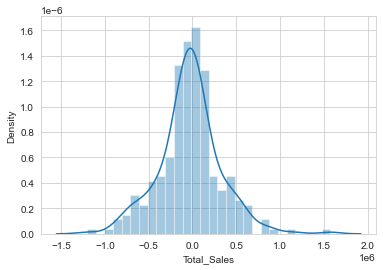

In [130]:
sns.distplot(y_test-y_pred)
plt.show()

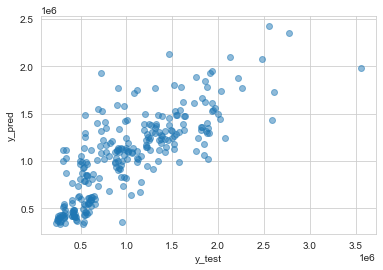

In [131]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### Hyper parameter tuning
Choose following method for hyperparameter tuning

#### RandomizedSearchCV
- Assign hyperparameters in form of dictionery
- Fit the model
- Check best paramters and best score

In [136]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 700, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,15, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 3,4,7,8,10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3,4, 5, 10]

In [137]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [138]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations

rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 7, cv = 5, verbose=2, random_state=0, n_jobs = 1)

In [139]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=233; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=233; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=233; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=233; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=233; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=566; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=566; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=566;

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=7, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 10],
                                        'min_samples_split': [2, 5, 3, 4, 7, 8,
                                                              10, 15],
                                        'n_estimators': [100, 166, 233, 300,
                                                         366, 433, 500, 566,
                                                         633, 700]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [140]:
# Finding the best parameter we should give in 
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [152]:
prediction = rf_random.predict(X_test)

metrics.r2_score(y_test,prediction)

0.6100435242989807

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


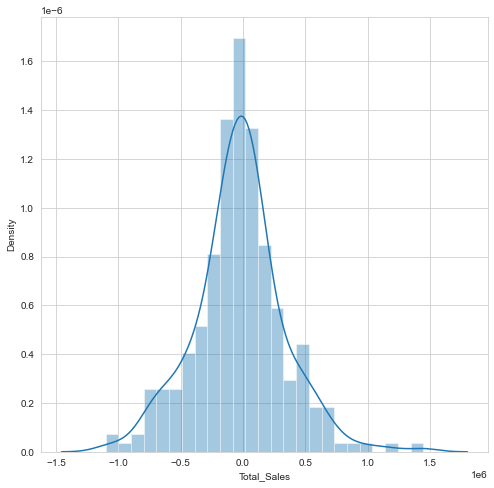

In [149]:

plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [145]:
rf_reg1= RandomForestRegressor(n_estimators=300, min_samples_split= 15, min_samples_leaf= 1, max_features='auto',
                               max_depth= 10)




In [146]:
rf_reg1.fit(X_train,y_train)
y_pred= rf_reg1.predict(X_test)

In [147]:
#Accuracy
print(rf_reg.score(X_test,y_test))
print(rf_reg.score(X_train,y_train))

0.6191232166602592
0.9450072582695768
